In [1]:
# Data Manipulation
import numpy as np
import statistics as st
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = lambda x: f'{x:0.2f}'

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Preprocesing
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.decomposition import PCA

# Algorithms
import xgboost as xgb
# import lightgbm as lm
# import catboost as cbt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluation
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score 

import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8715, 30), (8715, 1), (1772, 30), (1772, 1))

In [3]:
X_train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Creative_professionals,Business_professionals,Technical_professionals,Service_professionals,Early_months,Spring_months,Summer_months,Good_credit_mix,Standard_credit_mix,Small_value_payments,Medium_value_payments,Large_value_payments
count,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00
mean,33.03,10.53,8.04,5.17,5.29,13.89,3.67,20.29,12.62,9.87,5.25,6.91,32.30,223.25,0.46,4.33,4.85,5.86,0.13,0.19,0.19,0.15,0.40,0.26,0.10,0.38,0.34,0.30,0.25,0.08
std,10.52,0.74,0.75,2.45,2.11,8.74,2.11,15.06,6.43,6.43,3.75,0.92,4.84,99.89,0.50,0.86,0.82,0.42,0.34,0.39,0.39,0.36,0.49,0.44,0.30,0.49,0.47,0.46,0.44,0.26
min,14.00,8.86,5.77,1.00,1.00,1.00,0.00,0.00,0.00,-6.44,0.00,3.69,21.26,2.00,0.00,1.50,2.37,4.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,24.00,9.91,7.43,3.00,4.00,7.00,2.00,9.00,8.00,5.11,2.00,6.38,28.41,147.00,0.00,3.75,4.30,5.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,33.00,10.52,8.04,5.00,5.00,12.00,3.00,17.00,13.00,8.90,4.00,7.04,32.29,222.00,0.00,4.32,4.86,5.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,41.00,11.12,8.63,7.00,7.00,20.00,5.00,27.00,18.00,13.47,8.00,7.58,36.34,307.00,1.00,4.97,5.42,6.11,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00
max,56.00,12.06,9.59,10.00,10.00,33.00,9.00,67.00,27.00,35.82,16.00,8.52,46.59,403.00,1.00,7.21,7.13,7.22,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [4]:
scalar = StandardScaler()
scalar.fit(X_train.values)
scaled_x_train = pd.DataFrame(data=scalar.transform(X_train.values), columns=X_train.columns.to_list())
scaled_x_test = pd.DataFrame(data=scalar.transform(X_test.values), columns=X_test.columns.to_list())

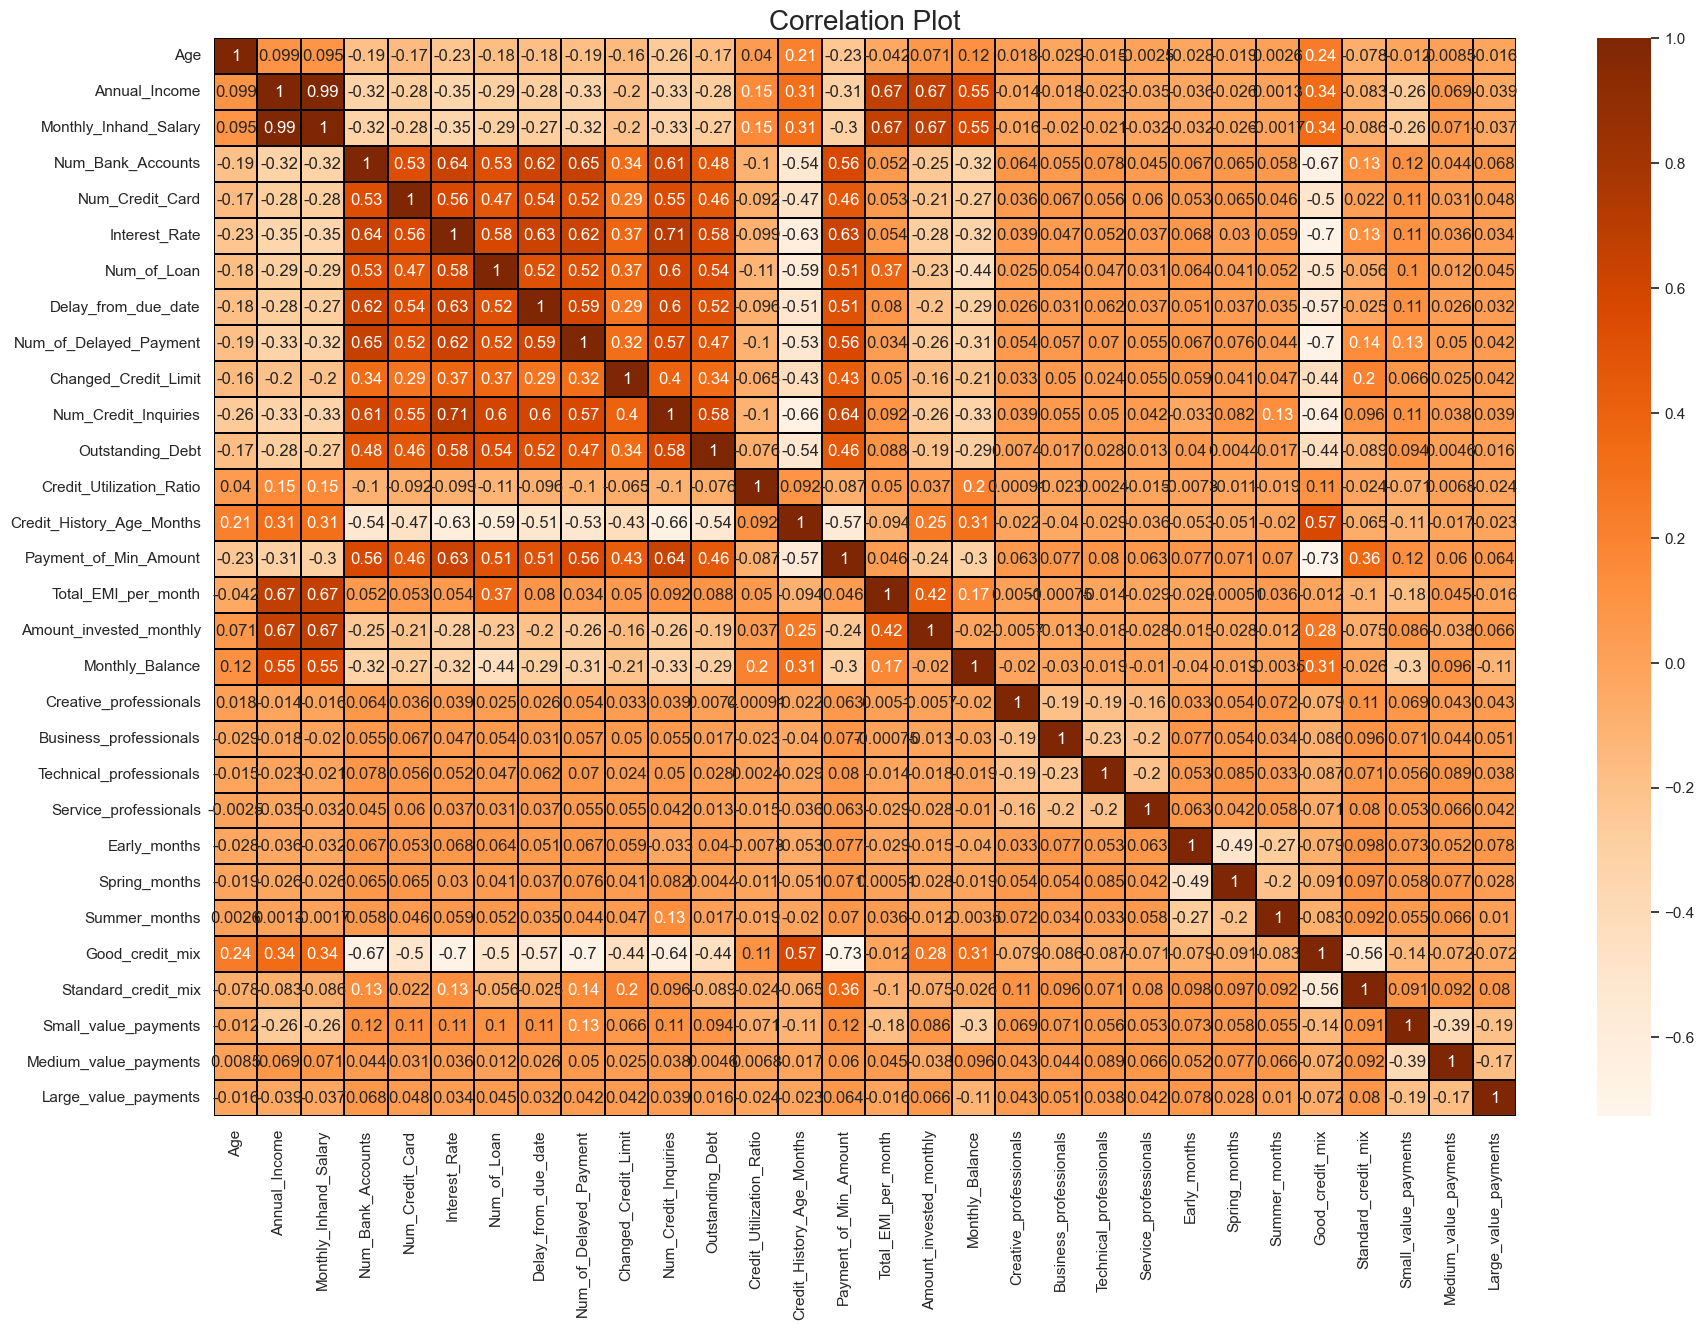

In [5]:
corelation = scaled_x_train.corr()
plt.figure(figsize=(21,14))
sns.heatmap(data=corelation, 
            xticklabels=corelation.columns, 
            yticklabels=corelation.columns, 
            annot=True, cmap='Oranges', linecolor='Black', linewidths=0.25
           )
plt.title('Correlation Plot', fontsize=20)
plt.show()

In [6]:
components = None
pca = PCA(n_components=components)
pca.fit(scaled_x_train.values)
print(pca.explained_variance_ratio_.cumsum()*100)

[ 26.51315439  35.87802332  41.28610065  46.32927672  51.19965779
  55.31362131  59.40489093  63.3052657   67.13107622  70.84625923
  74.27412536  77.41021847  80.23282248  82.97781013  85.12583039
  87.12110245  88.91413621  90.55941687  92.01092542  93.31699287
  94.47534686  95.5953729   96.64533783  97.53608835  98.33100724
  98.93632175  99.36037384  99.70698957  99.97654521 100.        ]


Text(0, 0.5, 'Explained variance (%)')

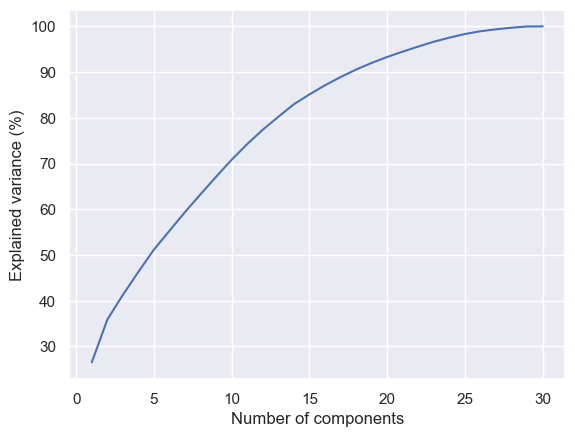

In [7]:
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[26.51315439 35.87802332 41.28610065 46.32927672 51.19965779 55.31362131
 59.40489093 63.3052657  67.13107622 70.84625923 74.27412536 77.41021847
 80.23282248 82.97781013 85.12583039 87.12110245 88.91413621 90.55941687
 92.01092542 93.31699287 94.47534686 95.5953729  96.64533783 97.53608835]
Number of components: 24


Text(0, 0.5, 'Explained variance (%)')

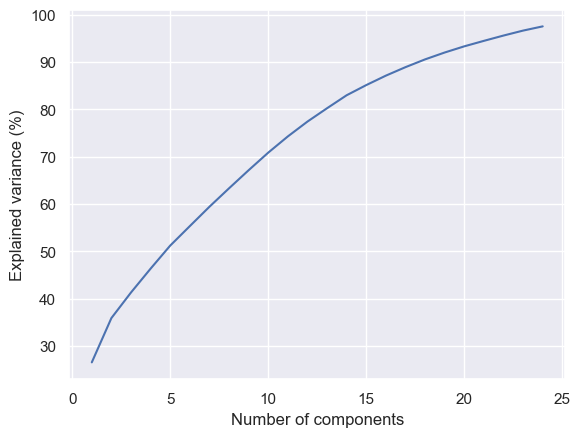

In [8]:
pca = PCA(n_components = .975)
pca.fit(scaled_x_train.values)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")


In [9]:
pca_components = abs(pca.components_)
print(pca_components)

[[1.03279010e-01 2.04465734e-01 2.03616460e-01 2.75237758e-01
  2.39869361e-01 2.94148107e-01 2.55691454e-01 2.59330860e-01
  2.72312330e-01 1.83268856e-01 2.88647040e-01 2.38891082e-01
  5.99605629e-02 2.67280129e-01 2.72381001e-01 1.72701556e-02
  1.48528337e-01 1.80038961e-01 2.06009753e-02 2.74872999e-02
  2.81097552e-02 2.38133127e-02 2.80509057e-02 2.81064811e-02
  2.64584124e-02 2.91865147e-01 7.30166447e-02 7.43773856e-02
  8.08814379e-03 2.38050800e-02]
 [5.58484285e-02 4.70103953e-01 4.69980843e-01 8.58795080e-02
  7.94832054e-02 8.71564325e-02 1.46371188e-01 1.07826923e-01
  7.29860482e-02 6.64101365e-02 1.07520624e-01 9.52082812e-02
  6.60731624e-02 9.39325587e-02 8.56595901e-02 5.24455738e-01
  3.15459488e-01 1.76422019e-01 9.07180220e-03 1.08701959e-02
  1.18802531e-02 9.74880153e-03 1.28962747e-02 1.06311898e-02
  4.02027460e-02 7.01205868e-02 2.24553039e-02 1.58284171e-01
  1.05852273e-01 8.16282754e-03]
 [3.09458951e-02 2.43126390e-02 2.43419550e-02 1.69209767e-02
  7.

In [10]:
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 7)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:7]
    
    # print the top 4 feature names
    print(f'Component {row}: {scaled_x_train.columns[indices].to_list()}')

Component 0: ['Interest_Rate', 'Good_credit_mix', 'Num_Credit_Inquiries', 'Num_Bank_Accounts', 'Payment_of_Min_Amount', 'Num_of_Delayed_Payment', 'Credit_History_Age_Months']
Component 1: ['Total_EMI_per_month', 'Annual_Income', 'Monthly_Inhand_Salary', 'Amount_invested_monthly', 'Monthly_Balance', 'Small_value_payments', 'Num_of_Loan']
Component 2: ['Standard_credit_mix', 'Medium_value_payments', 'Good_credit_mix', 'Monthly_Balance', 'Small_value_payments', 'Num_of_Loan', 'Spring_months']
Component 3: ['Early_months', 'Spring_months', 'Standard_credit_mix', 'Large_value_payments', 'Good_credit_mix', 'Business_professionals', 'Amount_invested_monthly']
Component 4: ['Small_value_payments', 'Medium_value_payments', 'Amount_invested_monthly', 'Standard_credit_mix', 'Spring_months', 'Early_months', 'Monthly_Balance']
Component 5: ['Technical_professionals', 'Summer_months', 'Business_professionals', 'Service_professionals', 'Creative_professionals', 'Spring_months', 'Early_months']
Compon

In [11]:
X_train_pca = pca.transform(scaled_x_train)
X_test_pca = pca.transform(scaled_x_test)

In [12]:
X_train_pca.shape, X_test_pca.shape

((8715, 24), (1772, 24))

<b>MODEL BUILDING<b>

In [13]:
model_params = {
    'xgboost' : {
        'model' : xgb.XGBClassifier(objective='multi:softprob', random_state=17),
        'params' : {
            'learning_rate' : [x for x in np.arange(0.01, 0.3, 0.02)],
            'n_estimators' : [x for x in range(100, 1200, 100)],
            'max_depth' : [int(x) for x in np.linspace(10, 90, 5)],
            'colsample_bytree' : [x for x in np.arange(0.1, 0.6, 0.1)],
            'subsample' : [x for x in np.arange(0.5, 1, 0.1)]

        }
    },

    'RandomForest' : {
        'model' : RandomForestClassifier(random_state=17),
        'params' : {
            'criterion' : ['gini', 'entropy'],
            'n_estimators' : [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
            'max_features' : ['auto', 'sqrt'],
            'max_depth' : [int(x) for x in np.linspace(10, 90, 5)],
            'min_samples_split' : [x for x in range(2, 10, 1)],
            'min_samples_leaf' : [x for x in range(2, 5, 1)],
            'bootstrap' : [True, False]
        }
    },

    'DecisionTree' : {
        'model' : DecisionTreeClassifier(random_state=17),
        'params' : {
            'criterion' : ['gini', 'entropy'],
            'splitter' : ['best', 'random'],
            'max_features' : ['auto', 'sqrt'],
            'max_depth' : [int(x) for x in np.linspace(10, 90, 5)],
            'min_samples_split' : [x for x in range(2, 10, 1)],
            'min_samples_leaf' : [x for x in range(2, 5, 1)],
        }    
    }
}

In [15]:
def best_model_params(x, y, model_params):
    '''helps select the best parameters for the hyper-parameters to use in training the data'''
    scores = []
    model_name = []
    best_params = []
    model_scores = pd.DataFrame()
    for model, mps in model_params.items():
        cross_val = RandomizedSearchCV(mps['model'], mps['params'], cv=10, n_iter=5, n_jobs=-1)
        cross_val.fit(x, y)
        model_name.append(model)
        scores.append(cross_val.best_score_)
        best_params.append(cross_val.best_params_)
    model_scores['Model'] = model_name
    model_scores['Scores'] = scores
    model_scores['Best_params'] = best_params
    

    return model_scores

In [16]:
best_model_params(X_train_pca, y_train, model_params)

,Model,Scores,Best_params
0,xgboost,0.80,"{'subsample': 0.6, 'n_estimators': 300, 'max_d..."
1,RandomForest,0.79,"{'n_estimators': 2000, 'min_samples_split': 2,..."
2,DecisionTree,0.68,"{'splitter': 'best', 'min_samples_split': 9, '..."


In [19]:
xgboost_alg = xgb.XGBClassifier(objective='multi:softprob', random_state=20)
params1 = {
    'learning_rate' : [x for x in np.arange(0.01, 0.3, 0.02)],
    'n_estimators' : [x for x in range(100, 1200, 100)],
    'max_depth' : [int(x) for x in np.linspace(10, 90, 5)],
    'colsample_bytree' : [x for x in np.arange(0.1, 0.6, 0.1)],
    'subsample' : [x for x in np.arange(0.5, 1, 0.1)]

}


In [20]:
cross_val = RandomizedSearchCV(xgboost_alg, params1, cv=11, n_iter=9, verbose=0, n_jobs=-1)
cross_val.fit(X_train_pca, y_train)

RandomizedSearchCV(cv=11,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                                          0.06999999999999999,
                

In [22]:
cross_val.best_score_,  cross_val.best_params_

(0.7977418342545018,
 {'subsample': 0.6,
  'n_estimators': 700,
  'max_depth': 30,
  'learning_rate': 0.12999999999999998,
  'colsample_bytree': 0.5})

In [23]:

model1 = xgb.XGBClassifier(
    learning_rate= .13,
    n_estimators= 700,
    max_depth= 30,
    colsample_bytree = 0.5,
    subsample= 0.6
)

model1.fit(X_train_pca, y_train)
model_1_pred = model1.predict(X_test_pca)
prediction_proba = model1.predict_proba(X_test_pca)

In [24]:
model1.score(X_test_pca, y_test)

0.7183972911963883

In [25]:
confusion_matrix(y_test, model_1_pred)

array([[165,   9,  71],
       [ 40, 375, 143],
       [ 99, 137, 733]], dtype=int64)

In [31]:
f1_score(y_test, model_1_pred, average='weighted')

0.7203969419181356

In [46]:
X_test_pca[12]

array([-1.49121755,  0.67084741,  2.20077266, -1.15638983,  0.06558934,
       -0.54562763, -0.4468909 ,  2.351349  , -0.12984415, -0.5003933 ,
        1.62740254,  1.84566465,  0.0384515 ,  0.59759132, -1.35312702,
       -0.36832403,  0.29725227,  0.53207041, -0.59722952,  0.49006653,
        0.31102999,  1.24004534,  0.31660289, -0.53057736, -0.04679423,
        0.14355676, -0.18874736,  0.37927958,  0.1403111 , -0.07166257])